## 240411 6주차 실습
- Seaborn
- Boston House Price

### Boston 집값 예측 데이터 들여다보기

In [4]:
import pandas as pd

column_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']

# boston 집값 데이터
boston_pd = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/boston_house_price.csv',  sep = "\s+", names=column_name)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# 데이터 읽어오기
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


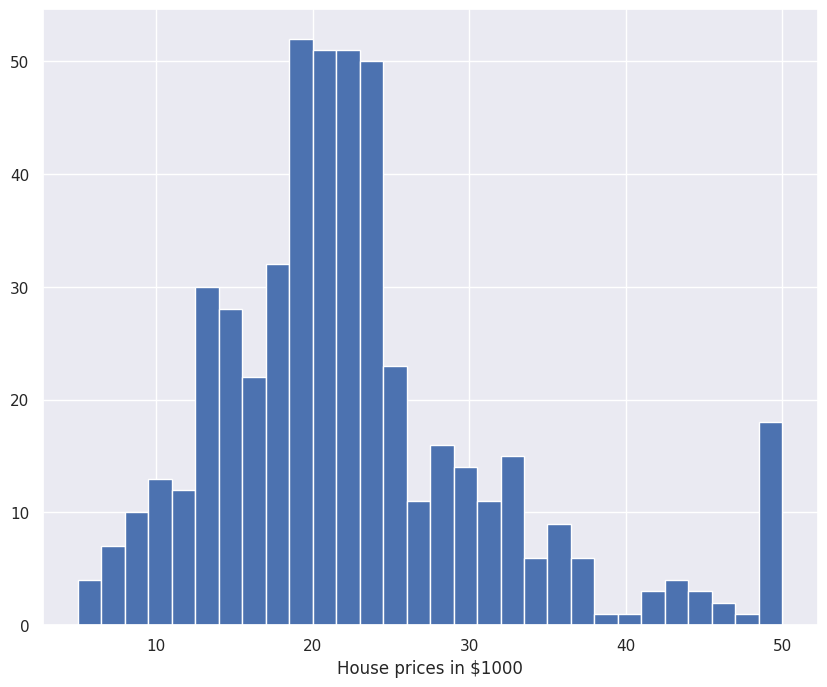

In [6]:
# target인 집값의 히스토그램 조사
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(10, 8)})
plt.hist(boston_pd['PRICE'], bins = 30)
plt.xlabel("House prices in $1000")
plt.show()

<Axes: >

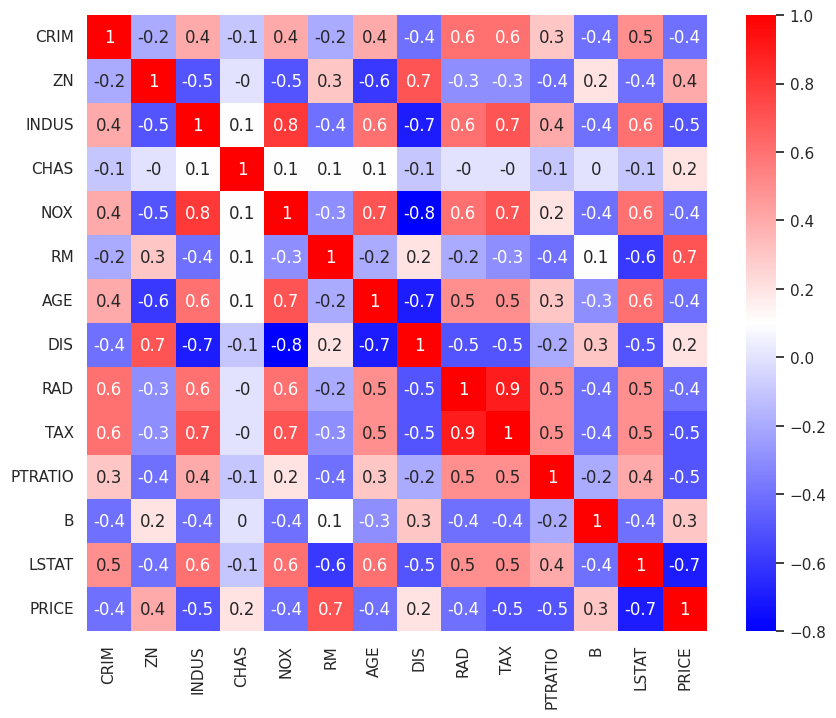

In [7]:
# 상관관계 조사

# pandas의 DataFrame은 corr()로 상관관계를 손쉽게 볼 수 있도록 도와줌
correlation_matrix = boston_pd.corr().round(1)
# 상관관계를 heatmap으로 그리면 눈으로 판독하기 좋음
sns.heatmap(data = correlation_matrix, annot = True, cmap='bwr')

<Axes: xlabel='LSTAT', ylabel='PRICE'>

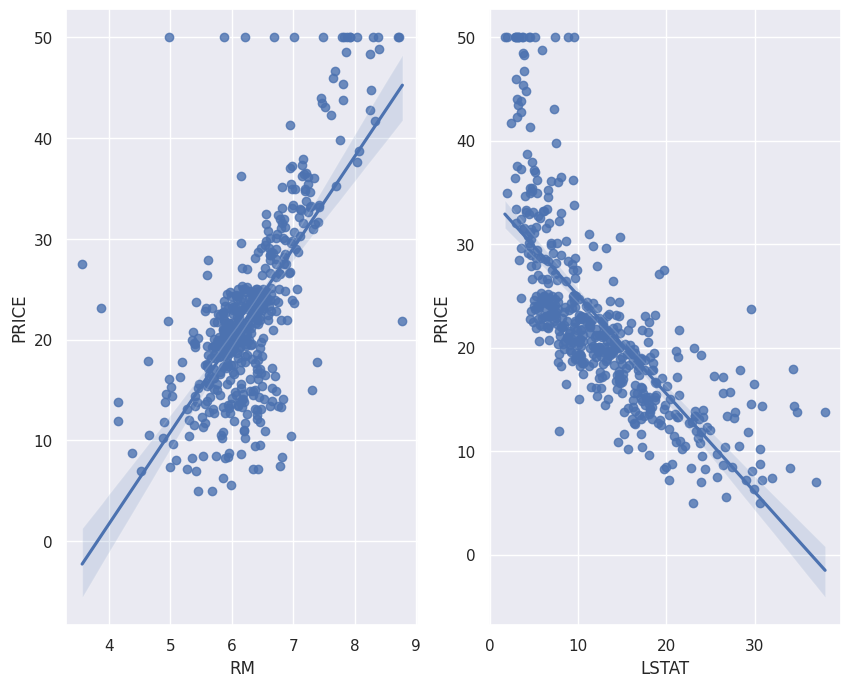

In [8]:
# RM(방 수)과 Price, LSTAT(저소득층)과 Price 들여다보기
  # 방이 많을수록, 저소득층 인구가 적을수록 -> 집 가격 높아짐
sns.set_style('darkgrid')
fig, axs = plt.subplots(ncols = 2)
sns.regplot(x = 'RM', y = 'PRICE', data = boston_pd, ax = axs[0])
sns.regplot(x = 'LSTAT', y = 'PRICE', data = boston_pd, ax = axs[1])

### 집 가격 예측을 위한 모델 구축 - 방 개수, 집 가격

In [17]:
# 데이터 준비
import numpy as np

X_rooms = boston_pd['RM']
y_price = boston_pd['PRICE']

print(np.array(X_rooms).shape)

(506,)


In [10]:
# reshape(-1,1) : 행의 개수는 상관 없고, 열만 1로 맞춰달라
X_rooms = np.array(X_rooms).reshape(-1, 1)

print(X_rooms.shape)
print(y_price.shape)

(506, 1)
(506,)


In [11]:
# 학습용 데이터 / 테스트용 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(X_rooms, y_price,
                 test_size = 0.2,
                 random_state = 77)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(404, 1)
(102, 1)
(404,)
(102,)


In [13]:
# 선형회귀 모델 학습
# sklearn.linear_model의 LinearRegression은 MSE(Mean Square Error) 이용
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
# fit : 학습 진행
reg.fit(X_train, y_train)

LinearRegression()

In [18]:
# 훈련용 데이터로 모델 평가 Mean Square Error 조사
# 회귀 문제는 예측 오차가 존재하므로 이를 측정할 수 있는 방법을 적용해야 함
from sklearn.metrics import mean_squared_error

y_train_predict = reg.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

print("The model performance for training set")
print("--------------------------------------")
print("RMSE is ", rmse)

The model performance for training set
--------------------------------------
RMSE is  6.773930079666117


In [15]:
# 테스트용 데이터로 모델 평가
y_test_predict = reg.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

print("The model performance for test set")
print("--------------------------------------")
print("RMSE is ", rmse)

The model performance for test set
--------------------------------------
RMSE is  5.885123878168727


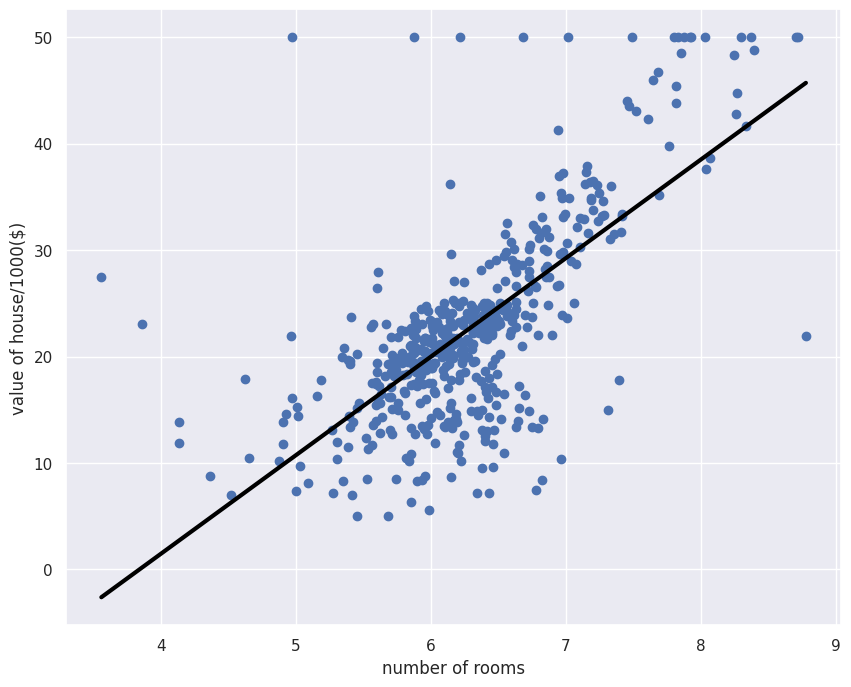

In [16]:
# 구축한 모델 그려보기

# 모델(직선)을 그리기 위해 x축 값 준비
prediction_space = np.linspace(min(X_rooms), max(X_rooms))
# 실제 값은 scatter로 그리고
plt.scatter(X_rooms, y_price)
# 예측 값은 plot 선으로 그리기
plt.plot(prediction_space, reg.predict(prediction_space),
         color = 'black', linewidth = 3)
plt.ylabel('value of house/1000($)')
plt.xlabel('number of rooms')
plt.show()

### 집 가격 예측을 위한 모델 구축 - 전체 특성 사용

In [20]:
X = boston_pd.drop('PRICE', axis = 1)
y = boston_pd['PRICE']

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size = 0.2,
                 random_state = 77)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression()

In [21]:
# 훈련용 데이터에 대한 성능
y_train_predict = reg_all.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

print("The model performance for training set")
print("--------------------------------------")
print("RMSE is ", rmse)

The model performance for training set
--------------------------------------
RMSE is  4.780762027920526


In [22]:
# 테스트용 데이터에 대한 성능
y_test_predict = reg_all.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

print("The model performance for test set")
print("--------------------------------------")
print("RMSE is ", rmse)

The model performance for test set
--------------------------------------
RMSE is  4.350775600983455


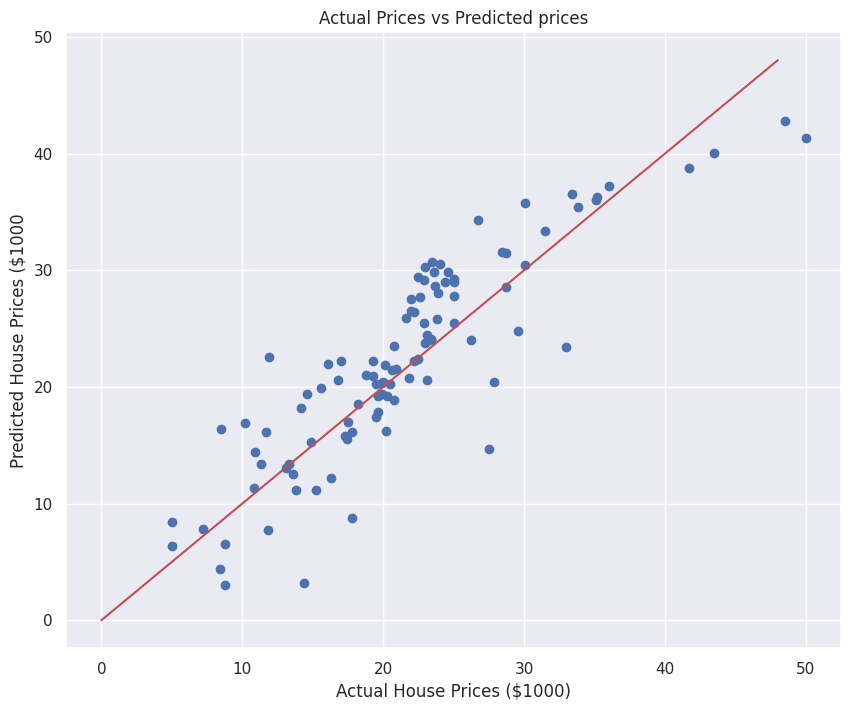

In [24]:
# 전체 특성에 대해 학습한 모델의
# 테스트용 데이터의 참 값과 예측 값
plt.scatter(y_test, y_test_predict)
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted House Prices ($1000")
plt.title("Actual Prices vs Predicted prices")
plt.plot([0, 48], [0, 48], 'r')